ION Data Analyst Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import time

In [27]:
import matplotlib.dates as md

In [37]:
import datetime

In [4]:
data = pd.read_csv(r"\Users\sangeeta\Downloads\Assignment file for Data Analyst - assignment file.csv")

In [5]:
data.drop(columns=['Grid power', 'Grid energy consumption', 'Grid cumulative energy consumption'], inplace=True)

In [6]:
data.drop(columns=['Application status', 'Total voltage', 'Current'], inplace=True)

In [73]:
data.head()

,Timestamp,SOC,Temperature,SOH,Equivalent cycle,Grid status,SOC diff,DateTime,Dates
0,1556701215000,1.0,25.229167,1.000000,0.0,1,NaN,737180.375174,2019-05-01 09:00:15+00:00
1,1556702215000,1.0,25.528210,0.999774,0.0,1,0.0,737180.386748,2019-05-01 09:16:55+00:00
2,1556703215000,1.0,25.859735,0.999679,0.0,1,0.0,737180.398322,2019-05-01 09:33:35+00:00
3,1556704215000,1.0,26.204830,0.999606,0.0,1,0.0,737180.409896,2019-05-01 09:50:15+00:00
4,1556705215000,1.0,26.553448,0.999542,0.0,1,0.0,737180.421470,2019-05-01 10:06:55+00:00


In [71]:
def tim(timestamp):
    m = int(timestamp/1000)
    return datetime.datetime.utcfromtimestamp(m).replace(tzinfo=datetime.timezone.utc)

In [72]:
data['Dates'] = data['Timestamp'].apply(tim)

In [44]:
datetime.datetime.utcfromtimestamp(1556705215).replace(tzinfo=datetime.timezone.utc)

datetime.datetime(2019, 5, 1, 10, 6, 55, tzinfo=datetime.timezone.utc)

In [12]:
data['SOC diff'] = data['SOC'].diff()

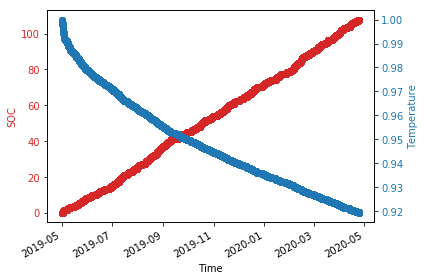

In [87]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('SOC', color=color)
ax1.plot_date(data['DateTime'], data['Equivalent cycle'], color=color, linestyle='solid')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)  # we already handled the x-label with ax1
ax2.plot_date(data['DateTime'], data['SOH'], color=color, linestyle='solid')
ax2.tick_params(axis='y', labelcolor=color)
plt.gcf().autofmt_xdate()
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

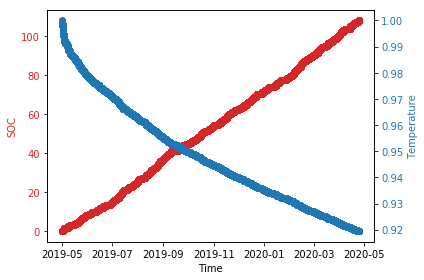

In [86]:
fig


In [195]:
data['Equivalent cycle'].corr(data['SOH'])

-0.9842624478536391

In [175]:
data.head()

,Timestamp,SOC,Temperature,SOH,Equivalent cycle,Grid status,dif
0,1556701215000,1.0,25.229167,1.000000,0.0,1,NaN
1,1556702215000,1.0,25.528210,0.999774,0.0,1,0.0
2,1556703215000,1.0,25.859735,0.999679,0.0,1,0.0
3,1556704215000,1.0,26.204830,0.999606,0.0,1,0.0
4,1556705215000,1.0,26.553448,0.999542,0.0,1,0.0
